# How to use Aerial Manipulator Environment
### Authors: Mahdi Shahrajabian, Hossein Otroushi
### March 2024

In [1]:
import numpy as np
import gymnasium as gym
from IPython.display import Video, display
import matplotlib.pyplot as plt

from AM_Env import AerialManipulatorEnv
from DynamicAerialManipulator.parameters_Aerial_Manipolator import parameters

In [2]:
def PlotOpenLoop(state_history, time_history, filename):
    time = np.array(time_history)  # Ensure time is a numpy array
    states = np.array(state_history)  # Ensure states are a numpy array

    # Extract positions, body angles, and arm angles
    positions = states[:, :3]  # x, y, z
    body_angles = np.rad2deg(states[:, 3:6])  # phi, theta, psi (convert to degrees)
    arm_angles = np.rad2deg(states[:, 6:9])  # n1, n2, n3 (convert to degrees)

    # Plot
    fig, axs = plt.subplots(3, 1, figsize=(6, 6))

    # Subplot 1: Position (x, y, z)
    axs[0].plot(time, positions[:, 0], label=r'$x$', color='b')
    axs[0].plot(time, positions[:, 1], label=r'$y$', color='g')
    axs[0].plot(time, positions[:, 2], label=r'$z$', color='r')
    #axs[0].set_title('Position ')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Position (m)')
    axs[0].legend()
    axs[0].grid()

    # Subplot 2: Body Angles (phi, theta, psi)
    axs[1].plot(time, body_angles[:, 0], label=r'$\phi$', color='b')
    axs[1].plot(time, body_angles[:, 1], label=r'$\theta$', color='g')
    axs[1].plot(time, body_angles[:, 2], label=r'$\psi$', color='r')
    #axs[1].set_title('Euler Angles')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Euler Angles (deg)')
    axs[1].legend()
    axs[1].grid()
    
    # Subplot 3: Arm Angles (n1, n2, n3)
    axs[2].plot(time, arm_angles[:, 0], label=r'$\eta_1$', color='b')
    axs[2].plot(time, arm_angles[:, 1], label=r'$\eta_2$', color='g')
    axs[2].plot(time, arm_angles[:, 2], label=r'$\eta_3$', color='r')
    #axs[2].set_title('Arm Angles')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Arm Angles (deg)')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    # plt.savefig(filename, bbox_inches='tight') 
    plt.show()
    return


def RunOpenLoop(env, inputs, n_steps, filename):

    state_history = []
    time_history = []

    # Open-loop simulation
    for step in range(n_steps):
        state,done = env.step(inputs)
        state_history.append(state)
        time_history.append(env.t)
        if done:
            break

    return PlotOpenLoop(state_history,time_history, filename)

## Hover Test 

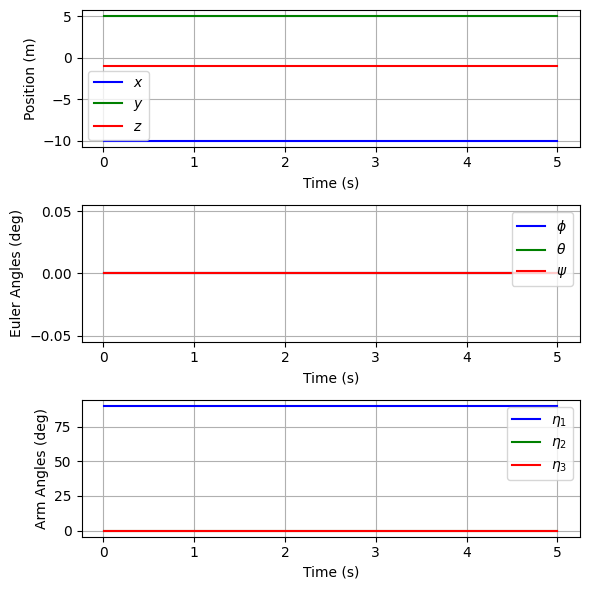

In [3]:
# Parameters
dt = 0.01  # Time-step
rad = np.pi / 180

# Initial conditions
P0 = np.array([-10, 5, -1]).reshape(-1,1)
PHI0 = rad * np.array([0, 0, 0]).reshape(-1,1)
N0 = rad * np.array([90, 0, 0]).reshape(-1,1)

PDot0 = np.array([0.0, 0, 0]).reshape(-1, 1)
PHIDot0 = rad * np.array([0, 0, 0]).reshape(-1, 1)
NDot0 = rad * np.array([0.0, 0, 0]).reshape(-1, 1)

initial_state = np.concatenate([P0, PHI0, N0, PDot0, PHIDot0, NDot0], axis=0).flatten()
n_steps = 500  # Total simulation steps

env = AerialManipulatorEnv(parameters, initial_state, dt)
env.reset()
mg = (parameters['mb']+parameters['mL0']+parameters['mL1']+parameters['mL2']+parameters['mL3'])*parameters['g']
# Constant inputs: thrust and torques
inputs = np.array([mg, 0, 0, 0, 0, 0, 0])  # Uncomment denormalize_action in AM_Env if your input is in the range [-1 1]
RunOpenLoop(env, inputs, n_steps, "OL_sim_hover.pdf")

## Take off

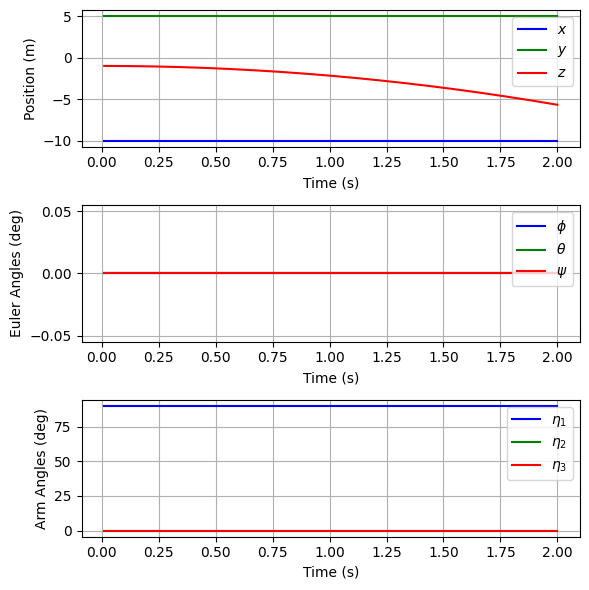

In [7]:
n_steps = 200  # Total simulation steps
env.reset()
inputs = np.array([mg+15, 0, 0, 0, 0, 0, 0])  
RunOpenLoop(env, inputs, n_steps, "OL_sim_takeoff.pdf")

## Move forward with negative pitch

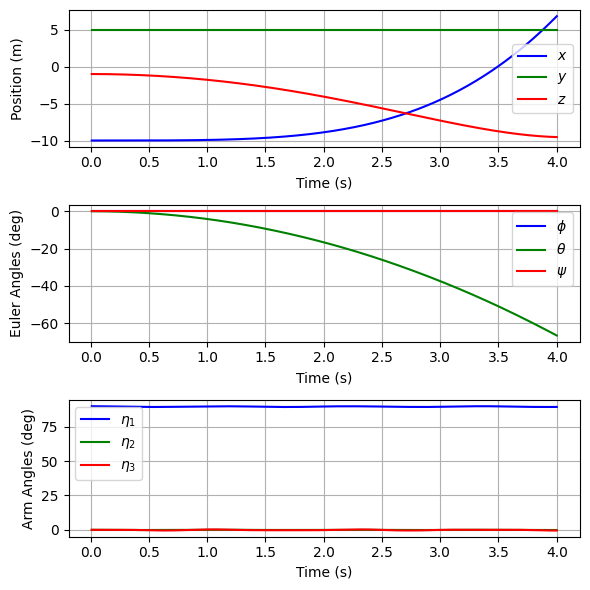

In [12]:
n_steps = 400  # Total simulation steps
env.reset()
inputs = np.array([mg+10, 0, -0.05, 0, 0, 0, 0])  
RunOpenLoop(env, inputs, n_steps,"OL_sim_pitch.pdf")

## Arms 

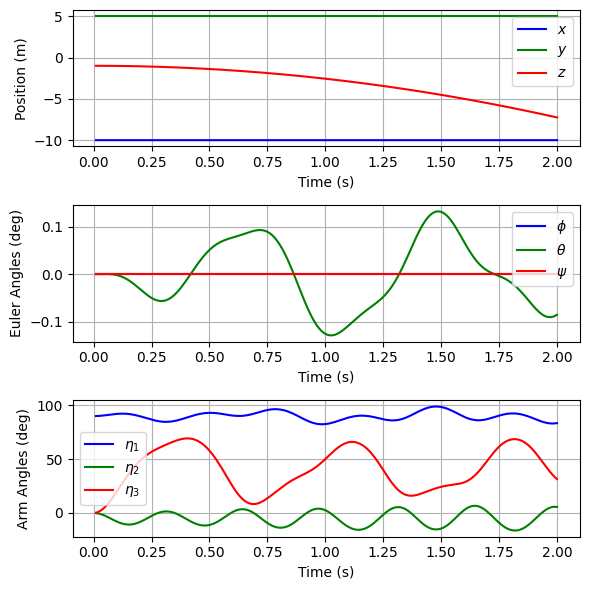

In [13]:
n_steps = 200  # Total simulation steps
env.reset()
inputs = np.array([mg+20, 0, 0, 0, 0, 0, 0.05])  
RunOpenLoop(env, inputs, n_steps, "OL_sim_arm.pdf")